In [3]:
!pip3 install torch==1.10.0+cu111 torchvision==0.11.1+cu111 -f https://download.pytorch.org/whl/cu111/torch_stable.html


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/cu111/torch_stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 GB 549.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 29.9 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 1.13.1+cu116
    Uninstalling torch-1.13.1+cu116:
      Successfully uninstalled torch-1.13.1+cu116
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.14.1+cu116
    Uninstalling torchvision-0.14.1+cu116:
      Successfully uninstalled torchvision-0.14.1+cu116
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.14.1 requires torch==1.13.1, but you have torch 1.10.0+cu111 which is incompatible.
torchaudio 0.13.1+cu116 requires

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.nn.modules.pooling import MaxPool2d

In [5]:
print(torch.__version__)

1.13.1+cu116


In [6]:
BATCH_SIZE = 32

## transformations
transform = transforms.Compose(
    [transforms.ToTensor()])

## download and load training dataset
trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

## download and load testing dataset
testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE,
                                         shuffle=False, num_workers=2)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



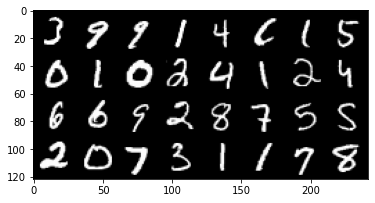

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

## functions to show an image
def imshow(img):
    #img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

## get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

## show images
imshow(torchvision.utils.make_grid(images))

In [ ]:
for images, labels in trainloader:
    print("Image batch dimensions:", images.shape)
    print("Image label dimensions:", labels.shape)
    break

Image batch dimensions: torch.Size([32, 1, 28, 28])
Image label dimensions: torch.Size([32])


# **Implementing LeNet-5**

The below code defines a LeNet5 class which inherits from nn.Module. The architecture is defined in the __init__ method:

The first convolutional layer (self.conv1) takes an input image with 1 channel and applies 6 filters with a kernel size of 5x5. This produces an output with dimensions 24x24x6.

The first pooling layer (self.pool1) downsamples the output of the first convolutional layer by a factor of 2, producing an output with dimensions 12x12x6.

The second convolutional layer (self.conv2)takes the output of the first pooling layer and applies 16 filters with a kernel size of 5x5. This produces an output with dimensions 8x8x16.

The second pooling layer (self.pool2) downsamples the output of the second convolutional layer by a factor of 2, producing an output with dimensions 4x4x16.

The output of the second pooling layer is then flattened (x.flatten) and passed through three fully connected layers (self.fc1, self.fc2, self.fc3) with 120, 84, and 10 neurons, respectively.

In the **forward method**, the input image is passed through the layers in sequence. The output of the first convolutional layer is passed through a ReLU activation function (F.relu). 

The output of the second convolutional layer is also passed through a ReLU activation function before being downsampled by the second pooling layer. 

The flattened output of the second pooling layer is then passed through the fully connected layers, each of which is followed by a ReLU activation function, except for the final layer which outputs the logits. 

Finally, the logits are passed through a softmax activation function 
(F.softmax) to produce the predicted class probabilities.




In [ ]:

class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()

        # 28x28x1 => 24x24x6
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        # 24x24x6 => 12x12x6
        self.pool1 = nn.MaxPool2d(kernel_size=2)
        # 12x12x6 => 8x8x16
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        # 8x8x16 => 4x4x16
        self.pool2 = nn.MaxPool2d(kernel_size=2)
        # 4x4x16 => 120
        self.fc1 = nn.Linear(4 * 4 * 16, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # 1x28x28 => 6x24x24
        x = self.conv1(x)
        x = F.relu(x)
        # 6x24x24 => 6x12x12
        x = self.pool1(x)
        # 6x12x12 => 16x8x8
        x = self.conv2(x)
        x = F.relu(x)
        # 16x8x8 => 16x4x4
        x = self.pool2(x)
        # 16x4x4 => 256
        x = x.flatten(start_dim=1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        logits = self.fc3(x)
        out = F.softmax(logits, dim=1)
        return out


# **Testing the model** with 1 batch to ensure that the output dimensions are what we expect.

In [ ]:
## test the model with 1 batch
model = LeNet5()
for images, labels in trainloader:
    print("batch size:", images.shape)
    out = model(images)
    print(out.shape)
    break

batch size: torch.Size([32, 1, 28, 28])
torch.Size([32, 10])


# **Training the Model**

Now we are ready to **train** the model but before that we are going to setup a loss function, an optimizer and a function to compute accuracy of the model.

In [ ]:
learning_rate = 0.001
num_epochs = 5

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = LeNet5()
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
## compute accuracy
def get_accuracy(logit, target, batch_size):
    ''' Obtain accuracy for training round '''
    corrects = (torch.max(logit, 1)[1].view(target.size()).data == target.data).sum()
    accuracy = 100.0 * corrects/batch_size
    return accuracy.item()

In [ ]:
for epoch in range(num_epochs):
    train_running_loss = 0.0
    train_acc = 0.0

    model = model.train()

    ## training step
    for i, (images, labels) in enumerate(trainloader):
        
        images = images.to(device)
        labels = labels.to(device)

        ## forward + backprop + loss
        logits = model(images)
        loss = criterion(logits, labels)
        optimizer.zero_grad()
        loss.backward()

        ## update model params
        optimizer.step()

        train_running_loss += loss.detach().item()
        train_acc += get_accuracy(logits, labels, BATCH_SIZE)
    
    model.eval()
    print('Epoch: %d | Loss: %.4f | Train Accuracy: %.2f' \
          %(epoch, train_running_loss / i, train_acc/i))        

Epoch: 0 | Loss: 1.6310 | Train Accuracy: 83.54
Epoch: 1 | Loss: 1.4993 | Train Accuracy: 96.44
Epoch: 2 | Loss: 1.4898 | Train Accuracy: 97.31
Epoch: 3 | Loss: 1.4858 | Train Accuracy: 97.70
Epoch: 4 | Loss: 1.4825 | Train Accuracy: 98.01


# **Compute accuracy on the testing dataset to see how well the model performs on the image classification task** - with Adam

In [ ]:
test_acc = 0.0
for i, (images, labels) in enumerate(testloader, 0):
    images = images.to(device)
    labels = labels.to(device)
    outputs = model(images)
    test_acc += get_accuracy(outputs, labels, BATCH_SIZE)
        
print('Test Accuracy: %.2f'%( test_acc/i))

Test Accuracy: 98.35


# **Improving Accuracy using Loss Function : SGD with Momentum**

In [ ]:
learning_rate = 0.1
momentum = 0.9 # defining momentum parameter
num_epochs = 10

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = LeNet5()
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


In [ ]:
## compute accuracy
def get_accuracy(logit, target, batch_size):
    ''' Obtain accuracy for training round '''
    corrects = (torch.max(logit, 1)[1].view(target.size()).data == target.data).sum()
    accuracy = 100.0 * corrects/batch_size
    return accuracy.item()

In [ ]:
for epoch in range(num_epochs):
    train_running_loss = 0.0
    train_acc = 0.0

    model = model.train()

    ## training step
    for i, (images, labels) in enumerate(trainloader):
        
        images = images.to(device)
        labels = labels.to(device)

        ## forward + backprop + loss
        logits = model(images)
        loss = criterion(logits, labels)
        optimizer.zero_grad()
        loss.backward()

        ## update model params
        optimizer.step()

        train_running_loss += loss.detach().item()
        train_acc += get_accuracy(logits, labels, BATCH_SIZE)
    
    model.eval()
    print('Epoch: %d | Loss: %.4f | Train Accuracy: %.2f' \
          %(epoch, train_running_loss / i, train_acc/i))        

Epoch: 0 | Loss: 1.9486 | Train Accuracy: 52.15
Epoch: 1 | Loss: 1.5337 | Train Accuracy: 93.11
Epoch: 2 | Loss: 1.5005 | Train Accuracy: 96.27
Epoch: 3 | Loss: 1.4927 | Train Accuracy: 97.04
Epoch: 4 | Loss: 1.4872 | Train Accuracy: 97.58
Epoch: 5 | Loss: 1.4846 | Train Accuracy: 97.85
Epoch: 6 | Loss: 1.4815 | Train Accuracy: 98.12
Epoch: 7 | Loss: 1.4799 | Train Accuracy: 98.28
Epoch: 8 | Loss: 1.4781 | Train Accuracy: 98.47
Epoch: 9 | Loss: 1.4769 | Train Accuracy: 98.56


# **Compute accuracy on the testing dataset to see how well the model performs on the image classification task**

In [ ]:
test_acc = 0.0
for i, (images, labels) in enumerate(testloader, 0):
    images = images.to(device)
    labels = labels.to(device)
    outputs = model(images)
    test_acc += get_accuracy(outputs, labels, BATCH_SIZE)
        
print('Test Accuracy: %.2f'%( test_acc/i))

Test Accuracy: 98.63


# **LeNet5 model Accuracy using Loss Function : AdaGrad**

In [ ]:
learning_rate = 0.01
num_epochs = 10

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = LeNet5()
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adagrad(model.parameters(), lr=learning_rate)


In [ ]:
## compute accuracy
def get_accuracy(logit, target, batch_size):
    ''' Obtain accuracy for training round '''
    corrects = (torch.max(logit, 1)[1].view(target.size()).data == target.data).sum()
    accuracy = 100.0 * corrects/batch_size
    return accuracy.item()

In [ ]:
for epoch in range(num_epochs):
    train_running_loss = 0.0
    train_acc = 0.0

    model = model.train()

    ## training step
    for i, (images, labels) in enumerate(trainloader):
        
        images = images.to(device)
        labels = labels.to(device)

        ## forward + backprop + loss
        logits = model(images)
        loss = criterion(logits, labels)
        optimizer.zero_grad()
        loss.backward()

        ## update model params
        optimizer.step()

        train_running_loss += loss.detach().item()
        train_acc += get_accuracy(logits, labels, BATCH_SIZE)
    
    model.eval()
    print('Epoch: %d | Loss: %.4f | Train Accuracy: %.2f' \
          %(epoch, train_running_loss / i, train_acc/i))        

Epoch: 0 | Loss: 1.5860 | Train Accuracy: 88.24
Epoch: 1 | Loss: 1.5038 | Train Accuracy: 96.13
Epoch: 2 | Loss: 1.4964 | Train Accuracy: 96.81
Epoch: 3 | Loss: 1.4924 | Train Accuracy: 97.21
Epoch: 4 | Loss: 1.4896 | Train Accuracy: 97.45
Epoch: 5 | Loss: 1.4876 | Train Accuracy: 97.66
Epoch: 6 | Loss: 1.4859 | Train Accuracy: 97.83
Epoch: 7 | Loss: 1.4846 | Train Accuracy: 97.94
Epoch: 8 | Loss: 1.4835 | Train Accuracy: 98.05
Epoch: 9 | Loss: 1.4825 | Train Accuracy: 98.13


In [ ]:
test_acc = 0.0
for i, (images, labels) in enumerate(testloader, 0):
    images = images.to(device)
    labels = labels.to(device)
    outputs = model(images)
    test_acc += get_accuracy(outputs, labels, BATCH_SIZE)
        
print('Test Accuracy: %.2f'%( test_acc/i))

Test Accuracy: 98.30


# **Import The Data from CIFAR10 dataset**

In [22]:
import torch
import torchvision
import torchvision.transforms as transforms

BATCH_SIZE = 32

# Define data transformations
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Download and load training dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

# Download and load testing dataset
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE,
                                         shuffle=False, num_workers=2)


Files already downloaded and verified
Files already downloaded and verified


In [23]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=32,
                                          shuffle=True, num_workers=2)

# convert images to RGB format
trainset.data = trainset.data.repeat(3, axis=3)



Files already downloaded and verified


# **Exploring the Data**

In [21]:
import matplotlib.pyplot as plt
import numpy as np

## functions to show an image
def imshow(img):
    npimg = img.numpy()
    npimg = np.clip(npimg, 0, 1)  # clip values to [0, 1]
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

## get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

## show images
imshow(torchvision.utils.make_grid(images))

TypeError: ignored

# **Check the dimensions of a batch**

In [7]:
for images, labels in trainloader:
    print("Image batch dimensions:", images.shape)
    print("Image label dimensions:", labels.shape)
    break

Image batch dimensions: torch.Size([32, 3, 32, 32])
Image label dimensions: torch.Size([32])


# **Implement AlexNet**

**Reduced the number of channels in the first convolutional layer to 64 to fit the smaller input size of CIFAR10 (32x32x3)**

Changed the number of output channels in the last fully connected layer to 10 to match the number of classes in CIFAR10

Added dropout layers after the fully connected layers to prevent overfitting.

**Input size ** :The CIFAR10 dataset consists of 32x32 RGB images, so we need to update the input size of the model accordingly. In the updated model, the first convolutional layer takes in an input of 3 channels (RGB) and produces an output of 64 channels with a kernel size of 3 and stride of 1.

**Pooling layers**: The AlexNet model uses pooling layers with a kernel size of 3 and stride of 2. However, since the CIFAR10 images are smaller than the ImageNet images used in the original paper, we reduce the kernel size to 2 and stride to 1 to prevent the output size from becoming too small.

**Output size**: The AlexNet model was designed to classify images into 1000 categories, but the CIFAR10 dataset only has 10 classes. Therefore, we need to change the output size of the last fully connected layer to 10.


In [44]:

class AlexNet(nn.Module):
    def __init__(self):
        super(AlexNet, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=64, out_channels=192, kernel_size=3, stride=1, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(in_channels=192, out_channels=384, kernel_size=3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(in_channels=384, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.conv5 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(256 * 4 * 4, 4096)
        self.fc2 = nn.Linear(4096, 4096)
        self.fc3 = nn.Linear(4096, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = F.relu(self.conv5(x))
        x = self.pool3(x)
        x = x.view(-1, 256 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, p=0.5, training=self.training)
        x = F.relu(self.fc2(x))
        x = F.dropout(x, p=0.5, training=self.training)
        logits = self.fc3(x)
        out = F.softmax(logits, dim=1)
        return out


# **Testing the model with 1 batch to ensure that the output dimensions are what we expect.**

In [45]:
## test the model with 1 batch
model = AlexNet()
for images, labels in trainloader:
    print("batch size:", images.shape)
    out = model(images)
    print(out.shape)
    break

batch size: torch.Size([32, 3, 32, 32])
torch.Size([32, 10])


In [46]:
model = AlexNet()

# Get a batch of testing images
images, labels = next(iter(testloader))

# Print the batch size and output shape
print("batch size:", images.shape)
out = model(images)
print(out.shape)


batch size: torch.Size([32, 3, 32, 32])
torch.Size([32, 10])


**Training the Model with optimiser : Adam**

In [11]:
learning_rate = 0.0001
num_epochs = 35

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = AlexNet()
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [12]:
## compute accuracy
def get_accuracy(logit, target, batch_size):
    ''' Obtain accuracy for training round '''
    corrects = (torch.max(logit, 1)[1].view(target.size()).data == target.data).sum()
    accuracy = 100.0 * corrects/batch_size
    return accuracy.item()

**Training the model**

In [13]:
for epoch in range(num_epochs):
    train_running_loss = 0.0
    train_acc = 0.0

    model = model.train()

    ## training step
    for i, (images, labels) in enumerate(trainloader):
        
        images = images.to(device)
        labels = labels.to(device)

        ## forward + backprop + loss
        logits = model(images)
        loss = criterion(logits, labels)
        optimizer.zero_grad()
        loss.backward()

        ## update model params
        optimizer.step()

        train_running_loss += loss.detach().item()
        train_acc += get_accuracy(logits, labels, BATCH_SIZE)
    
    model.eval()
    print('Epoch: %d | Loss: %.4f | Train Accuracy: %.2f' \
          %(epoch, train_running_loss / i, train_acc/i))        

Epoch: 0 | Loss: 2.1689 | Train Accuracy: 28.03
Epoch: 1 | Loss: 2.0590 | Train Accuracy: 39.75
Epoch: 2 | Loss: 2.0018 | Train Accuracy: 45.59
Epoch: 3 | Loss: 1.9560 | Train Accuracy: 50.24
Epoch: 4 | Loss: 1.9290 | Train Accuracy: 52.92
Epoch: 5 | Loss: 1.9021 | Train Accuracy: 55.71
Epoch: 6 | Loss: 1.8859 | Train Accuracy: 57.36
Epoch: 7 | Loss: 1.8673 | Train Accuracy: 59.28
Epoch: 8 | Loss: 1.8479 | Train Accuracy: 61.13
Epoch: 9 | Loss: 1.8341 | Train Accuracy: 62.61
Epoch: 10 | Loss: 1.8211 | Train Accuracy: 63.93
Epoch: 11 | Loss: 1.8095 | Train Accuracy: 65.09
Epoch: 12 | Loss: 1.7994 | Train Accuracy: 66.10
Epoch: 13 | Loss: 1.7870 | Train Accuracy: 67.38
Epoch: 14 | Loss: 1.7791 | Train Accuracy: 68.05
Epoch: 15 | Loss: 1.7710 | Train Accuracy: 68.94
Epoch: 16 | Loss: 1.7672 | Train Accuracy: 69.35
Epoch: 17 | Loss: 1.7587 | Train Accuracy: 70.21
Epoch: 18 | Loss: 1.7509 | Train Accuracy: 70.92
Epoch: 19 | Loss: 1.7457 | Train Accuracy: 71.53
Epoch: 20 | Loss: 1.7425 | Tra

**Compute accuracy on the testing dataset to see how well the model performs on the image classification task**

In [14]:
test_acc = 0.0
for i, (images, labels) in enumerate(testloader, 0):
    images = images.to(device)
    labels = labels.to(device)
    outputs = model(images)
    test_acc += get_accuracy(outputs, labels, BATCH_SIZE)
        
print('Test Accuracy: %.2f'%( test_acc/i))

Test Accuracy: 75.04


**Implement Batch Regularisation with AlexNet Model**

In [16]:
import torch.nn.functional as F

class AlexNet(nn.Module):

    def __init__(self, num_classes=10):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(64, 192, kernel_size=5, padding=2),
            nn.BatchNorm2d(192),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.BatchNorm2d(384),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
        )

        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 2 * 2, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x


In [17]:
learning_rate = 0.0001
num_epochs = 40

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = AlexNet()
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [18]:
## compute accuracy
def get_accuracy(logit, target, batch_size):
    ''' Obtain accuracy for training round '''
    corrects = (torch.max(logit, 1)[1].view(target.size()).data == target.data).sum()
    accuracy = 100.0 * corrects/batch_size
    return accuracy.item()

In [19]:
for epoch in range(num_epochs):
    train_running_loss = 0.0
    train_acc = 0.0

    model = model.train()

    ## training step
    for i, (images, labels) in enumerate(trainloader):
        
        images = images.to(device)
        labels = labels.to(device)

        ## forward + backprop + loss
        logits = model(images)
        loss = criterion(logits, labels)
        optimizer.zero_grad()
        loss.backward()

        ## update model params
        optimizer.step()

        train_running_loss += loss.detach().item()
        train_acc += get_accuracy(logits, labels, BATCH_SIZE)
    
    model.eval()
    print('Epoch: %d | Loss: %.4f | Train Accuracy: %.2f' \
          %(epoch, train_running_loss / i, train_acc/i))        

RuntimeError: ignored

In [ ]:
test_acc = 0.0
for i, (images, labels) in enumerate(testloader, 0):
    images = images.to(device)
    labels = labels.to(device)
    outputs = model(images)
    test_acc += get_accuracy(outputs, labels, BATCH_SIZE)
        
print('Test Accuracy: %.2f'%( test_acc/i))

Test Accuracy: 57.46


**Implement Dropout regularisation with AlexNet Model**

In [ ]:
import torch.nn as nn

class AlexNet(nn.Module):
    def __init__(self, num_classes=10):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(64, 192, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
        )
        self.avgpool = nn.AdaptiveAvgPool2d((6, 6))
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x


In [51]:
learning_rate = 0.0001
num_epochs = 40

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = AlexNet()
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [52]:
## compute accuracy
def get_accuracy(logit, target, batch_size):
    ''' Obtain accuracy for training round '''
    corrects = (torch.max(logit, 1)[1].view(target.size()).data == target.data).sum()
    accuracy = 100.0 * corrects/batch_size
    return accuracy.item()

In [53]:
for epoch in range(num_epochs):
    train_running_loss = 0.0
    train_acc = 0.0

    model = model.train()

    ## training step
    for i, (images, labels) in enumerate(trainloader):
        
        images = images.to(device)
        labels = labels.to(device)

        ## forward + backprop + loss
        logits = model(images)
        loss = criterion(logits, labels)
        optimizer.zero_grad()
        loss.backward()

        ## update model params
        optimizer.step()

        train_running_loss += loss.detach().item()
        train_acc += get_accuracy(logits, labels, BATCH_SIZE)
    
    model.eval()
    print('Epoch: %d | Loss: %.4f | Train Accuracy: %.2f' \
          %(epoch, train_running_loss / i, train_acc/i))        

Epoch: 0 | Loss: 2.1841 | Train Accuracy: 26.44
Epoch: 1 | Loss: 2.0687 | Train Accuracy: 38.74
Epoch: 2 | Loss: 2.0126 | Train Accuracy: 44.43
Epoch: 3 | Loss: 1.9756 | Train Accuracy: 48.24
Epoch: 4 | Loss: 1.9389 | Train Accuracy: 51.93
Epoch: 5 | Loss: 1.9079 | Train Accuracy: 55.10
Epoch: 6 | Loss: 1.8825 | Train Accuracy: 57.66
Epoch: 7 | Loss: 1.8676 | Train Accuracy: 59.31
Epoch: 8 | Loss: 1.8484 | Train Accuracy: 61.16
Epoch: 9 | Loss: 1.8396 | Train Accuracy: 62.10
Epoch: 10 | Loss: 1.8267 | Train Accuracy: 63.39
Epoch: 11 | Loss: 1.8071 | Train Accuracy: 65.30
Epoch: 12 | Loss: 1.7989 | Train Accuracy: 66.16
Epoch: 13 | Loss: 1.7904 | Train Accuracy: 67.04
Epoch: 14 | Loss: 1.7818 | Train Accuracy: 67.87
Epoch: 15 | Loss: 1.7729 | Train Accuracy: 68.74
Epoch: 16 | Loss: 1.7634 | Train Accuracy: 69.72
Epoch: 17 | Loss: 1.7609 | Train Accuracy: 69.99
Epoch: 18 | Loss: 1.7524 | Train Accuracy: 70.81
Epoch: 19 | Loss: 1.7421 | Train Accuracy: 71.88
Epoch: 20 | Loss: 1.7403 | Tra

In [54]:
test_acc = 0.0
for i, (images, labels) in enumerate(testloader, 0):
    images = images.to(device)
    labels = labels.to(device)
    outputs = model(images)
    test_acc += get_accuracy(outputs, labels, BATCH_SIZE)
        
print('Test Accuracy: %.2f'%( test_acc/i))

Test Accuracy: 73.97
